In [1]:
!pip install tweepy
! pip install vaderSentiment

In [2]:
# load packages
# Note: please install the Tweepy package if you haven't
#       to do so, run "pip install tweepy" on your command line

# Tweepy allows us to access the twitter API in python
import tweepy  

# Pandas wil lallow us to extract tweets/users and load the data into dataframe 
import pandas as pd

# JSON will allow us to work with JSON files
import json

# json_normalize() will allows us to normalize semi-structured JSON data into a flat table
from pandas import json_normalize

from collections import Counter

You should now be able to input the correct values below

In [3]:
# Variables that contain the credentials to access Twitter API
# Use your own key and tokens instead
consumer_key    = "JCeDkTdmEYZpAoD9oW6mPGr"
consumer _secret = "1egGe9VtdkZtoza1NuxiETn3MZfl2LJbr8xiClOafmZgDkVN"
access_key      = "1484113915722498052-pQLSRVT0KkhOl61LDmQPnZ1HqV95"
access_secret   = "3uiAQkQXajEqdzM0RVJAeA1YQQEZbvvgKII6T8hbgQ2"

# Setup access to API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

# create the API object
api = tweepy.API(auth)

Now, just to make sure it worked, let's check the most recent tweets from your own timeline.

In [4]:
# most recent 5 tweets from your twitter timeline
recent_tweets = api.home_timeline(count=5)
for tweet in recent_tweets:
    print(tweet.text)

If coziness has a fragrance, it’s the aroma of red wine simmering on the stove with citrus and spices. https://t.co/wETWa4zZ0e
Works on any moving land object https://t.co/Xu4qKJW4D9
RT @nicoagrant: A disappointing quarter for Google's parent Alphabet would be a fabulous quarter for most other companies. It made $13.9 bi…
Tonight's debate between Dr. Mehmet Oz, a Republican, and Lt. Gov. John Fetterman, a Democrat, may be critical to d… https://t.co/wVr7Jobyyg
Gov. Kathy Hochul of New York and her Republican opponent, Rep. Lee Zeldin, will meet Tuesday night for the first a… https://t.co/qiDcg2p8wN


Yes! We got a bunch of tweets from our timeline!  This isn't practically very helpful, but it shows us how we can use Twitter's API to get data. In fact, Tweepy API is a really powerful tool:
- it has many methods that we can use
- it gives us a very convenient way to fetch large volumes of data

## 2. Getting a user's tweets 

- First use the user_timeline method with the correct argument to get the last 100 tweets of the user "iamchitrang"
- Print the text of the first 10 tweets

In [5]:
screen_name = "iamchitrang"
count = 100
tweets = api.user_timeline(screen_name=screen_name,count = count)

for tweet in tweets[:10]:
    print(tweet.text)

@dggoldst Same!!
@BenHanowell @AyalChenZion but to disown someone for..getting a job?
@BenHanowell @AyalChenZion That person probably only cared for what they could get from you. Not for you.
@Andrew___Baker lieutenant is also great
@CZimm_economist more on economists on twitter and their followers: https://t.co/N6htGSiuaJ

(we used REPEC to get our seed data!)
@johnjhorton nice attempt to get into our Slack, John https://t.co/fkRQ6opdkL
@AndreyFradkin I'm sure @BrianCAlbrecht  has opinions!
@dggoldst @johnjhorton Dan Goldstein, a renowned Wisdom scholar, wrote recently in one of his papers that...
@KhoaVuUmn It's super effective!
RT @johnjhorton: Imagine you transferred a good to a group you expected to have MPC = 0 (i.e., just saved it), but instead, some "over-cons…


### Note:

The **user_timeline** function returns a "tweet" object. 

According to [Twitter API's official documenttation](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/tweet-object), each tweet object has a long list of attributes that you can access, including the text attribute we used above. 
- You can access each attribute as you access JSON attributes. JSON is a file format used widely.
- You can either work with all of the attributes, or pick up the most relevant features that you want. 
- Of course, we can always extract the attributes we're interested, and put them in a dataframe.

In [ ]:
# for all tweets that you scraped in the last step, extract the following features
# (i) the unique integer identifier of the tweet
# (ii) the utf-8 text of the tweet
# (iii) the utc time of the tweet 
# (iv) the device used to write the tweet
# (v) the number of retweets the tweet has received
# (vi) the number of likes the tweet has received
# append these attributes as the values of a dictionary for each tweet to a list called "tweet_list"

In [6]:
ID = []
tweets = []
likes = []
time = []
retweet = []
Source = []
for i in tweepy.Cursor(api.user_timeline, screen_name='iamchitrang',tweet_mode="extended").items(100):
    ID.append(i.id)
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)
    retweet.append(i.retweet_count)
    Source.append(i.source)

In [19]:
# put these attributes to a pandas dataframe

In [7]:
df = pd.DataFrame({'ID':ID,'tweet_list':tweets,'Date & Time':time,'Source':Source,'retweet':retweet,'likes':likes})

In [8]:
df_last = df[::1]
df_last.head(10)

,ID,tweet_list,Date & Time,Source,retweet,likes
0,1585032352971251713,@dggoldst Same!!,2022-10-25 22:15:36+00:00,Twitter Web App,0,1
1,1578957434164760580,@BenHanowell @AyalChenZion but to disown someo...,2022-10-09 03:56:02+00:00,Twitter Web App,0,0
2,1578953019143557120,@BenHanowell @AyalChenZion That person probabl...,2022-10-09 03:38:29+00:00,Twitter Web App,0,0
3,1573500088479006723,@Andrew___Baker lieutenant is also great,2022-09-24 02:30:29+00:00,Twitter Web App,0,0
4,1570863809484693504,@CZimm_economist more on economists on twitter...,2022-09-16 19:54:52+00:00,Twitter Web App,0,1
5,1570843041182945281,@johnjhorton nice attempt to get into our Slac...,2022-09-16 18:32:20+00:00,Twitter Web App,0,2
6,1570837926535372806,@AndreyFradkin I'm sure @BrianCAlbrecht has o...,2022-09-16 18:12:01+00:00,Twitter Web App,0,2
7,1569874741644648448,"@dggoldst @johnjhorton Dan Goldstein, a renown...",2022-09-14 02:24:39+00:00,Twitter Web App,0,2
8,1554846393679896577,@KhoaVuUmn It's super effective!,2022-08-03 15:07:22+00:00,Twitter Web App,0,5
9,1553109935109677061,RT @johnjhorton: Imagine you transferred a goo...,2022-07-29 20:07:18+00:00,Twitter Web App,2,0


This is a good foundation for you to to start with your twitter data analysis. Example studies could include
- text analysis, such as sentiment analysis and topic modeling
- summarize some usage patterns of a celebrity. For example, some data scientists analyzed Trump's usage patterns to tell whether and when Trump used a ghost writer instead of writing his own Tweets
-  ** your idea goes here! **

## 3. Getting user objects - followers

Scrape information for all followers of a user. You may choose the "iamchitrang" account, or any other account you want that has between 100 and 1000 followers. Store the information on a dataframe. The information should include:
- the follower's id
- the follower's name
- the follower's screen name
- the follower's location
- the follower's description
- the follower's profile url
- the follower's follower count
- the follower's followee count
- the follower's favorites count

This example shows there are multiple ways to extract twitter data into a dataframe. It really depends on your task to choose the proper method.

1. We can look into the attributes, and pick the ones we need as we did for tweets
   - Pros: the result is more precise
   - Cons: more manual work, have the risk of losing some data 
   
  
2. We can also keep all the attributes and dump them into json as we did for followers
   - Pros: more data, less manual filtering 
   - Cons: the result is clumsy

In [9]:
followers = [[follower.id,follower.name,follower.screen_name,follower.location,follower.description,'https://twitter.com/'+follower.screen_name,follower.followers_count,follower.favourites_count,follower.friends_count] for follower in api.get_followers(screen_name = screen_name,count = 100)]

In [10]:
columns = ["ID","Name","Screen Name","Location","Description","Profile URL","Followers Count","Favourites Count","Following Count"]
df = pd.DataFrame(followers, columns=columns)
df.head(10)

,ID,Name,Screen Name,Location,Description,Profile URL,Followers Count,Favourites Count,Following Count
0,1584686156821762048,KEN_Lu,KENLu45691923,,,https://twitter.com/KENLu45691923,0,0,1
1,1355220096,Leonard Mazzone,Lenmazzone,"New York, NY","Software Engineer, Writer, MBA and former Film...",https://twitter.com/Lenmazzone,91,15,267
2,1426550821844488196,pavasg_,pavas222,,"UArizona Economics, English, and Philo. Freque...",https://twitter.com/pavas222,58,2504,1527
3,1959071580,Bernardo de Moura,deMouraBernardo,"Santiago, Chile","Nerd-Dad, Zombie-Dad, Outdoorsy-Dad, One-more-...",https://twitter.com/deMouraBernardo,223,2629,1976
4,2378506692,Fat Yoshi,FatY0sh1,"West New York, NJ",,https://twitter.com/FatY0sh1,45,179,73
5,1513561614435373062,Martin Serramo,martin_serramo,Chicago,Curious.,https://twitter.com/martin_serramo,25,1072,340
6,808051518242979841,"SwissCognitive, World-Leading AI Network",SwissCognitive,Switzerland,Cross-industry global community of business le...,https://twitter.com/SwissCognitive,149408,16357,106940
7,2330683771,Martín,mrtnserramo,,curioso,https://twitter.com/mrtnserramo,25,4835,758
8,1541588756565790722,Big Data Energy,bayesianbro,The woods,"Whisky sipper, casual inferer, aspiring optimi...",https://twitter.com/bayesianbro,78,351,1870
9,77684723,Zaiyan Wei,zaiyan_w,"West Lafayette, IN","#Economics, #InformationSystems, #FinTech",https://twitter.com/zaiyan_w,114,7,153


## 4. Case study: Elon Musk on Twitter

Let's go through an example about how to do some basic data analysis with twitter API. 

- First extract 400 tweets from Elon Musk's twitter account

In [11]:
tweets = []
for i in tweepy.Cursor(api.user_timeline, screen_name='elonmusk',tweet_mode="extended").items(400):
    tweets.append(i.full_text)

In [12]:
df = pd.DataFrame({'tweet_list':tweets})

In [13]:
df

,tweet_list
0,Works on any moving land object https://t.co/X...
1,@chazman @lexfridman Fasting rocks
2,@VitalikButerin @balajis @zengjiajun_eth Had t...
3,@dogeofficialceo @DirtyTesLa @rocobasilisk @Sw...
4,@garyblack00 @SawyerMerritt One man’s hedge is...
...,...
395,"Also worth noting that a possible, albeit unli..."
396,This is highly likely to be the outcome in the...
397,Ukraine-Russia Peace:\n\n- Redo elections of a...
398,@jasondebolt Yes


- Generate a word cloud with the top 20 words used by elon musk
(use the *WordCloud* python module)

In [14]:
!pip install wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS

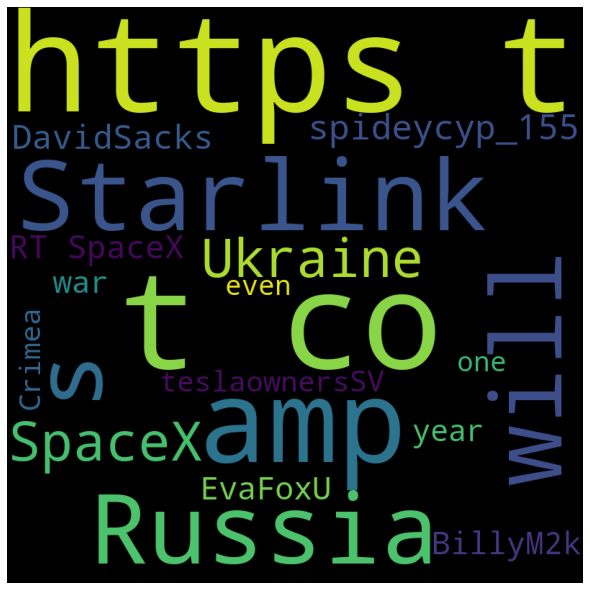

In [16]:
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
unique_string=" ".join(tweets)
wordcloud = WordCloud(width = 800, height = 800, max_words=20).generate(unique_string)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Use VADER to conduct a simple sentiment analysis.

- Sentiment analysis is the interpretation and classification of emotions
- VADER is a pre-trained sentiment analysis tool that is specifically attuned to sentiments expressed in social media
- We will use it to determine whether a piece of writing is positive, negative or neutral
- The sentiment score is usually a float between -1 to 1, from most negative to most positive

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# MODIFY THE CODE BELOW TO RUN FOR YOUR DATA

## define a function to calculate the sentiment score for each tweet
def sentiment_analyzer_scores(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    return score['compound']

# apply the function to create the score column
df['score'] = df['tweet_list'].apply(lambda x: sentiment_analyzer_scores(x))

Now classify tweets that have 
- score >0 as 'positive', 
- score 0 as 'neutral', 
- score <0 as 'negative'

In [18]:
df.loc[df['score'] > 0, 'Sentiment'] = 'positive'
df.loc[df['score'] < 0, 'Sentiment'] = 'negative'
df.loc[df['score'] == 0, 'Sentiment'] = 'neutral'

In [19]:
df

,tweet_list,score,Sentiment
0,Works on any moving land object https://t.co/X...,0.0000,neutral
1,@chazman @lexfridman Fasting rocks,0.0000,neutral
2,@VitalikButerin @balajis @zengjiajun_eth Had t...,0.0000,neutral
3,@dogeofficialceo @DirtyTesLa @rocobasilisk @Sw...,0.0000,neutral
4,@garyblack00 @SawyerMerritt One man’s hedge is...,0.0000,neutral
...,...,...,...
395,"Also worth noting that a possible, albeit unli...",-0.6833,negative
396,This is highly likely to be the outcome in the...,-0.5994,negative
397,Ukraine-Russia Peace:\n\n- Redo elections of a...,0.5574,positive
398,@jasondebolt Yes,0.4019,positive


Import "seaborn" and make a histogram of the number of positive, neutral, and negative tweets

Text(0.5, 1.0, 'Musk Sentiment')

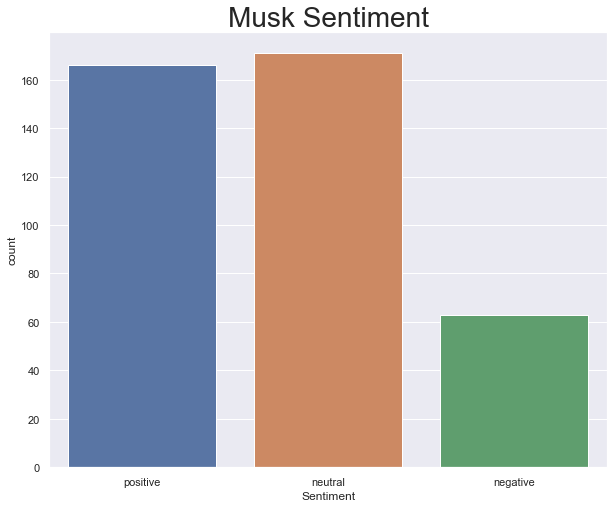

In [20]:
## ADAPT THE CODE BELOW TO WORK FOR YOUR DATA

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.countplot(x=df['Sentiment'], order=['positive', 'neutral', 'negative']).set_title('Musk Sentiment', fontsize=28)

# 5. Scraping more information

Now let's do some work to get more familiar with the twitter API! Please follow the steps below:

1. Extract the latest 200 tweets from Tim Cook. (**@tim_cook**)
2. Show the overall distribution of his tweets' like counts.
3. What's his most liked tweet? What's its sentiment score?

In [ ]:
# YOUR CODE STARTS FROM HERE

In [21]:
tweets = []
likes = []
for i in tweepy.Cursor(api.user_timeline, screen_name='tim_cook',tweet_mode="extended").items(200):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)

In [22]:
df = pd.DataFrame({'tweet_list':tweets,'likes':likes})

In [23]:
df

,tweet_list,likes
0,Fighting climate change is one of Apple’s most...,1557
1,This photo beautifully captures why Diwali is ...,48166
2,Stopped by Apple Domain NORTHSIDE and Apple Ba...,5745
3,It's been nearly 30 years since Apple opened i...,5749
4,Our engineering teams in Austin are hard at wo...,27578
...,...,...
195,Congratulations to the cast and crew of @TedLa...,12333
196,One of my all-time favorite shows is back! Cat...,4218
197,Always great to chat with you @iJustine! So gl...,14361
198,"Introducing iPhone 13 and iPhone 13 Pro, all-n...",35800


2. Show the overall distribution of his tweets' like counts

D:\Anaconda Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


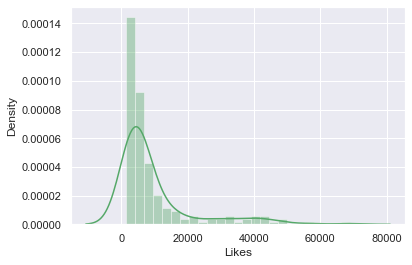

In [24]:
from sklearn.datasets import load_diabetes

sns.set()


#Get Data
data = load_diabetes()
X, y_ = data.data, likes

#Organize Data
SR_y = pd.Series(y_, name="Likes")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, bins=25, color="g", ax=ax)
plt.show()

3. What's his most liked tweet? What's its sentiment score?

In [25]:
def sentiment_analyzer_scores(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    return score['compound']

# apply the function to create the score column
df['score'] = df['tweet_list'].apply(lambda x: sentiment_analyzer_scores(x))

In [26]:
values = ['positive', 'neutral', 'negative']

df.loc[df['score'] > 0, 'Sentiment'] = 'positive'
df.loc[df['score'] < 0, 'Sentiment'] = 'negative'
df.loc[df['score'] == 0, 'Sentiment'] = 'neutral'

In [27]:
df1 = df.sort_values(by=['likes'], ascending=False)

df1.head(1)

,tweet_list,likes,score,Sentiment
96,Eid Mubarak to everyone celebrating around the...,68942,0.9583,positive


In [28]:
print('The most liked tweet is '+ str(df1['likes'][96])+' and its sentiment score is '+ str(df1['score'][96])+' and Sentement is '+str(df1['Sentiment'][96])+' tweet')

The most liked tweet is 68942 and its sentiment score is 0.9583 and Sentement is positive tweet
